EXERCICE 1

a) D'après la loi de Snell-Descartes :
$n_{\text{air}} \cdot \sin(\phi) = n_{c} \cdot \sin(\theta_{\text{r}})$

Aussi on a: $n_{c} \sin(\theta_{c}) = n_{g} \sin\left(\frac{\pi}{2}\right)$
, avec $\theta_{c} = \frac{\pi}{2} - \theta_{r}$

Donc $n_{\text{air}} \cdot \sin(\phi) = n_{c} \cdot \cos(\theta_{\text{c}})$
,or $\sin(\theta_{c}) = \frac{n_{g}}{n_{c}}$

Ainsi: $\sin(\phi) = \sqrt{n_{c}^{2} - n_{g}^{2}}$

b) D'après le cours: $$\Delta T = \frac{n_{c}}{c} \cdot L \cdot \sqrt{\frac{1}{\sin(\theta_{c})} - 1}$$

Or $$\sin(\theta_{c}) = \sqrt{1 - \cos^2(\theta_{c})} = \sqrt{1 - \left(\frac{\sin(\phi)}{n_{c}}\right)^2}$$

D'où $$\Delta T = \frac{n_{c}}{c} \cdot l \cdot \sqrt{\frac{1}{\sqrt{1 - \left(\frac{\sin(\phi)}{n_{c}}\right)^2}} - 1}$$

c) C'est la dispersion modale

d) $$T_{b} = \frac{1}{D} > \Delta T$$
,donc $$D_{max} = \frac{1}{\Delta T}$$

e) $$\Delta T = 3.29 µs$$








EXERCICE 2

$$V = \frac{2 \pi a}{\lambda} \times \sqrt{n_{c}^{2} - n_{g}^{2}}=\frac{D \pi }{\lambda} \times \sqrt{n_{c}^{2} - n_{g}^{2}}$$

La condition pour que la fibre soit monomode est :$$V <2.405 $$ 
Donc, $$D=\frac{\lambda}{\pi \cdot \sqrt{n_{c}^{2} - n_{g}^{2}}}=6.5 µm$$


EXERCICE 3
 
a) $P_{s}=P_{e}-A=-10-30=-40dBm=10^{-7}W$

b)$$L=\frac{A}{A_{linéique}}=150 Km$$



EXERCICE 4

a) La structure 6 permet de proteger la fibre optique de l'eau

b)L'eau interfère avec la transmission de lumière dans les fibres optiques en raison de sa différence d'indice de réfraction par rapport au verre des fibres. Cette interférence peut entraîner des pertes de signal et altérer la qualité de transmission des données. 

c)On aura besoin : d'amplificateurs optiques

EXERCICE 5

On cherche à résoudre l'équation de l'enveloppe de l'onde propagé suivante :

$$\dfrac{\partial A}{\partial z} (z,t) = -i\dfrac{\beta_2}{2} \dfrac{\partial^2 A}{\partial t^2} (z,t) $$
tel que :
$$\beta_2 = -\dfrac{D\lambda^2}{2\pi c} $$

In [3]:
import numpy as np
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [4]:
# Paramètres physiques
λ = 1.55 * u.um
D = 17.0 * u.ps / (u.nm * u.km)  # Dispersion Coefficient
beta_2 = - D * λ**2/(2 * np.pi * const.c) # Group velocity dispersion parameter
B = 1 * u.kbit / u.s # Bit rate
L = 1.0 * u.m  # Fiber Lenght
T = 0.5 * u.s       # Total duration of the simulation
Nx = 100      # Nombre de points spatiaux
Nt = 500      # Nombre de pas de temps

# Discrétisation spatiale et temporelle
dx = L / (Nx - 1)
dt = T / Nt

# Conditions initiales et aux limites
u = np.zeros((Nx, Nt+1))
u[:, 0] = np.sin(np.pi * np.linspace(0, 1, Nx))  # Condition initiale sinusoïdale
u[0, :] = 0  # Condition aux bords
u[-1, :] = 0

# Résolution numérique de l'équation de la chaleur
for n in range(0, Nt):
    for i in range(1, Nx-1):
        u[i, n+1] = u[i, n] + alpha * dt / dx**2 * (u[i+1, n] - 2*u[i, n] + u[i-1, n])


NameError: name 'alpha' is not defined

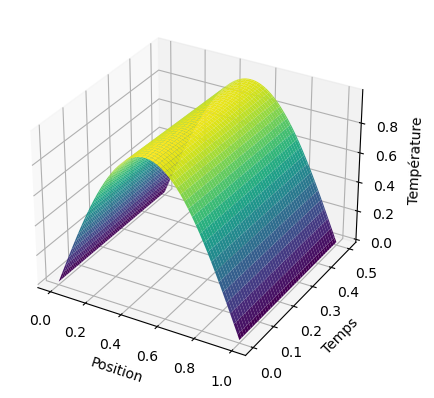

In [ ]:
# Affichage des résultats
X, T = np.meshgrid(np.linspace(0, L, Nx), np.linspace(0, T, Nt+1))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u.T, cmap='viridis')
ax.set_xlabel('Position')
ax.set_ylabel('Temps')
ax.set_zlabel('Température')
plt.show()